In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn import cross_validation
import xgboost as xgb
import time
def loaddata(Filename):
    data = pd.read_csv(Filename,sep=',',header = None)
    return np.array(data)
# dataset
data1 = loaddata("data0_1.csv")
data2 = loaddata("data1_1.csv")
data3 = loaddata("data2_1.csv")
data4 = loaddata("data3_1.csv")
data5 = loaddata("data4_1.csv")

data_train = np.vstack((data1[:len(data1)-1],data2[:len(data1)]))
data_train = np.vstack((data_train,data3[:len(data1)]))
data_train = np.vstack((data_train,data4[:len(data1)]))
data_train = np.vstack((data_train,data5[:len(data1)]))

print('This is data_train',type(data_train),data_train.shape)
#label
data1 = loaddata("label0_1.csv")
data2 = loaddata("label1_1.csv")
data3 = loaddata("label2_1.csv")
data4 = loaddata("label3_1.csv")
data5 = loaddata("label4_1.csv")

label_train = np.vstack((data1[:len(data1)-1],data2[:len(data1)]))
label_train = np.vstack((label_train,data3[:len(data1)]))
label_train = np.vstack((label_train,data4[:len(data1)]))
label_train = np.vstack((label_train,data5[:len(data1)]))
#print(label_test[100:800])
train_X,test_X,train_Y,test_Y=cross_validation.train_test_split(data_train,label_train,test_size=0.1)

print('This is X_test',type(X_test),X_test.shape)
print('This is y_test',type(y_test),y_test.shape)
print('This cell has done...')

This is data_train <class 'numpy.ndarray'> (25954, 661)
This is X_test <class 'numpy.ndarray'> (2596, 661)
This is y_test <class 'numpy.ndarray'> (2596, 1)
This cell has done...


In [32]:
xg_train = xgb.DMatrix( train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 16
param['num_class'] = 5

watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist );
# get prediction
pred = bst.predict( xg_test );
print(pred)

print ('predicting, classification error=%f' 
       % (sum( int(pred[i]) != test_Y[i] for i in range(len(test_Y))) / float(len(test_Y)) ))

# do the same thing again, but output probabilities
param['objective'] = 'multi:softprob'
bst = xgb.train(param, xg_train, num_round, watchlist );
# Note: this convention has been changed since xgboost-unity
# get prediction, this is in 1D array, need reshape to (ndata, nclass)
yprob = bst.predict( xg_test ).reshape( test_Y.shape[0], 5 )
print(yprob)
ylabel = np.argmax(yprob, axis=1)  # return the index of the biggest pro
print ('predicting, classification error=%f' 
       % (sum( int(ylabel[i]) != test_Y[i] for i in range(len(test_Y))) / float(len(test_Y)) ))

[0]	train-merror:0.05938	test-merror:0.052388
[1]	train-merror:0.05968	test-merror:0.052388
[2]	train-merror:0.059209	test-merror:0.053159
[3]	train-merror:0.059637	test-merror:0.052388
[4]	train-merror:0.059509	test-merror:0.052003
[ 1.  2.  0. ...,  2.  4.  4.]
predicting, classification error=0.052003
[0]	train-merror:0.05938	test-merror:0.052388
[1]	train-merror:0.05968	test-merror:0.052388
[2]	train-merror:0.059209	test-merror:0.053159
[3]	train-merror:0.059637	test-merror:0.052388
[4]	train-merror:0.059509	test-merror:0.052003
[[ 0.13809687  0.44727162  0.13807431  0.13820949  0.13834777]
 [ 0.1379887   0.138189    0.44748169  0.13810122  0.1382394 ]
 [ 0.44747347  0.13819671  0.13797385  0.13810891  0.13824709]
 ..., 
 [ 0.1379887   0.138189    0.44748169  0.13810122  0.1382394 ]
 [ 0.19817194  0.1985793   0.19813958  0.19864337  0.20646583]
 [ 0.13806143  0.13826185  0.1380389   0.13817403  0.44746372]]
predicting, classification error=0.052003



Precision: 95.76122172173801%
Recall: 94.79969183359015%
f1_score: 94.90471219278197%

Confusion Matrix:
[[516   1   0   0   0]
 [  0 512   0   1   1]
 [  0   0 501   0   0]
 [  0  72   0 444   3]
 [  1  56   0   0 488]]

Confusion matrix (normalised to % of total test data):
[[ 19.87673378   0.0385208    0.           0.           0.        ]
 [  0.          19.72265053   0.           0.0385208    0.0385208 ]
 [  0.           0.          19.29892159   0.           0.        ]
 [  0.           2.77349758   0.          17.10323524   0.1155624 ]
 [  0.0385208    2.15716481   0.           0.          18.79815102]]
Note: training and testing data is not equally distributed amongst classes, 
so it is normal that more than a 6th of the data is correctly classifier in the last category.


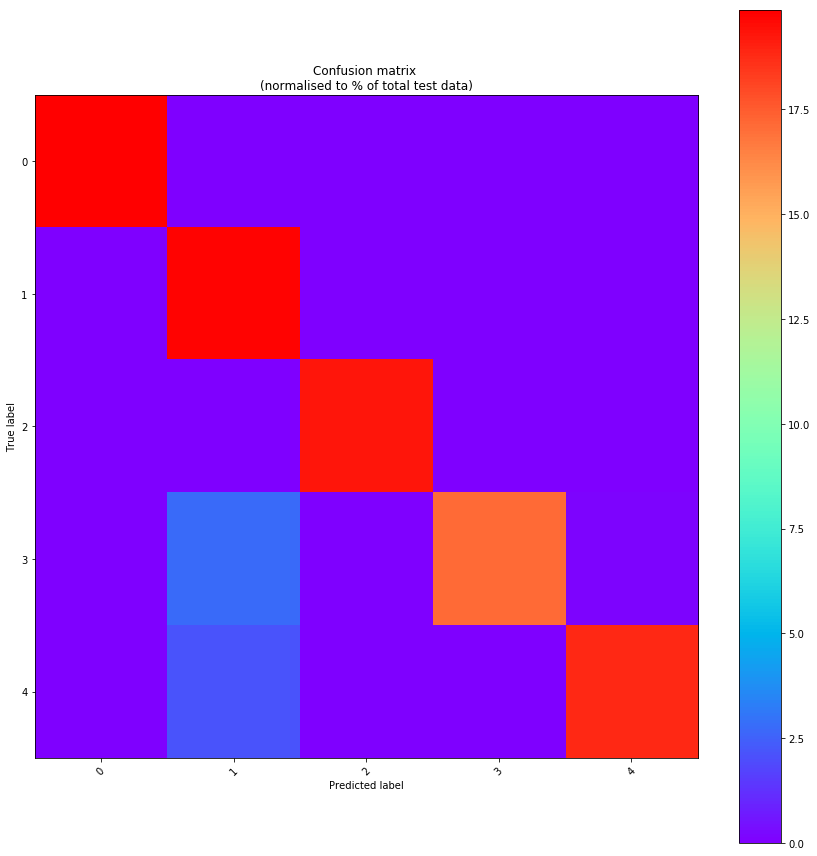

In [17]:
# Results
expected = test_Y  
predicted = pred
import matplotlib.pyplot as plt
LABELS = [
    "0",
    "1",
    "2",
    "3",
    "4",
]
print("")
print("Precision: {}%".format(100*metrics.precision_score(expected, predicted, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(expected, predicted, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(expected, predicted, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(expected, predicted)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(5) # n_classes
plt.xticks(tick_marks, LABELS, rotation=45)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()